Objective: Prepare a model for glass classification using KNN

In [2]:
"""
Created on 16th Aug 2020
@author: Shilpa Chavan
Algorithm : KNN Algorithm
Dataset : glass.csv
"""

# Importing Libraries 
import pandas as pd
import numpy as np

# Load the Data

In [4]:
glass = pd.read_csv("D:\\Shilpa\\Datascience\\Assignments\\KNN\\glass.csv")

# Exploratory data analysis

In [6]:
glass.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [8]:
#how many unique values are there
glass['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [9]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [11]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# Training and Test dataset

In [13]:
# Training and Test data using 
from sklearn.model_selection import train_test_split
train,test = train_test_split(glass,test_size = 0.2) # 0.2 => 20 percent of entire data 
x_train = train.iloc[:,0:9]
y_train=train.iloc[:,9]

# Getting the optimal K value

In [15]:
# KNN using sklearn 
# Importing Knn algorithm from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier as KNC
# creating empty list variable 
acc = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values 
 
for i in range(3,50,2):
    neigh = KNC(n_neighbors=i)
    neigh.fit(train.iloc[:,0:9],train.iloc[:,9])
    train_acc = np.mean(neigh.predict(train.iloc[:,0:9])==train.iloc[:,9])
    test_acc = np.mean(neigh.predict(test.iloc[:,0:9])==test.iloc[:,9])
    acc.append([train_acc,test_acc])

# Visualizing the K Value Vs Accuracy for training & test set

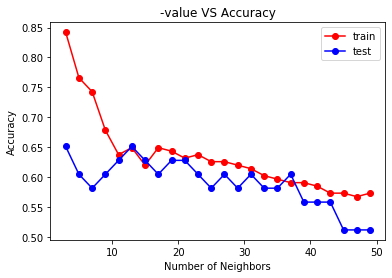

In [16]:
import matplotlib.pyplot as plt # library to do visualizations 

# train accuracy plot 
plt.plot(np.arange(3,50,2),[i[0] for i in acc],"ro-")
# test accuracy plot
plt.plot(np.arange(3,50,2),[i[1] for i in acc],"bo-")#bo is blue
plt.legend(["train","test"])
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In above graph k value from 1 to 10 have high accuracy for both train and test set with little diffrence. 
so, we will plot graph for k=1 to 10 to get accurate value of k.

In [24]:
# creating empty list variable 
acc1 = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values 
 
for i in range(1,12,2):
    neigh = KNC(n_neighbors=i)
    neigh.fit(train.iloc[:,0:9],train.iloc[:,9])
    train_acc1 = np.mean(neigh.predict(train.iloc[:,0:9])==train.iloc[:,9])
    test_acc1 = np.mean(neigh.predict(test.iloc[:,0:9])==test.iloc[:,9])
    acc1.append([train_acc1,test_acc1])

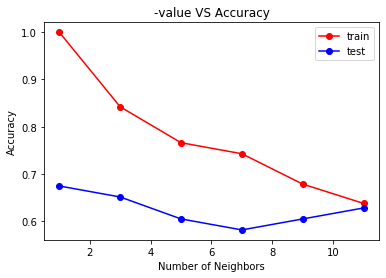

In [27]:
import matplotlib.pyplot as plt # library to do visualizations  
# train accuracy plot 
plt.plot(np.arange(1,12,2),[i[0] for i in acc1],"ro-")

# test accuracy plot
plt.plot(np.arange(1,12,2),[i[1] for i in acc1],"bo-")
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend(["train","test"])
plt.show()

# Model Training and Evaluation for K=11

In [42]:
# for 11 nearest neighbours
neigh = KNC(n_neighbors=11)

# fitting with training data
neigh.fit(train.iloc[:,0:9],train.iloc[:,9])
x_train = train.iloc[:,0:9]
y_train= train.iloc[:,9]
y_pred= neigh.predict(x_train)
# train accuracy 
train_acc = np.mean(y_pred==y_train)
print("Training Accuracy:", train_acc)

# test accuracy
test_acc = np.mean(neigh.predict(test.iloc[:,0:9])==test.iloc[:,9])
print("Test Accuracy:", test_acc)

Training Accuracy: 0.6374269005847953
Test Accuracy: 0.627906976744186


# Model Validation using cross vaildation method

In [36]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier as KNCl

In [37]:
y1=glass.iloc[:,9] #9th column is our dependent variable
inputvariables1=list(glass) #it contain list of all columns
del inputvariables1[9] #from that list we deleted 9th column
x1=glass[inputvariables1] #from rest of column we store data into x

In [38]:
# split the data set into train and test
x_1, x_test, y_1, y_test = model_selection.train_test_split(x1, y1, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
x_tr, x_cv, y_tr, y_cv = model_selection.train_test_split(x_1, y_1, test_size=0.3)

for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNCl(n_neighbors=i)

    # fitting the model on crossvalidation train
    knn.fit(x_tr, y_tr)

    # predict the response on the crossvalidation train
    pred1 = knn.predict(x_cv)

    # evaluate CV accuracy
    acc1 = accuracy_score(y_cv, pred1, normalize=True) * float(100)
    print('\nCross Validation accuracy for k = %d is %d%%' % (i, acc1))


Cross Validation accuracy for k = 1 is 77%

Cross Validation accuracy for k = 3 is 75%

Cross Validation accuracy for k = 5 is 62%

Cross Validation accuracy for k = 7 is 60%

Cross Validation accuracy for k = 9 is 60%

Cross Validation accuracy for k = 11 is 62%

Cross Validation accuracy for k = 13 is 57%

Cross Validation accuracy for k = 15 is 60%

Cross Validation accuracy for k = 17 is 60%

Cross Validation accuracy for k = 19 is 60%

Cross Validation accuracy for k = 21 is 60%

Cross Validation accuracy for k = 23 is 60%

Cross Validation accuracy for k = 25 is 55%

Cross Validation accuracy for k = 27 is 57%

Cross Validation accuracy for k = 29 is 55%


# Final Model building with k =1 

In [39]:
knn_final= KNCl(1)
knn_final.fit(x_tr,y_tr)
pred_test= knn_final.predict(x_test)
acc_test= accuracy_score(y_test, pred_test, normalize=True) * float(100)
print('\n Test accuracy for k =1  is %d%%' % (acc_test))


 Test accuracy for k =1  is 73%
